In [98]:
import numpy as np 
import pandas as pd 

In [99]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5
100,101,0,nissan nv200,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549.0
146,147,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463.0
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0
115,116,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630.0
28,29,-1,dodge dart custom,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921.0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
141,142,0,subaru,gas,std,four,sedan,fwd,front,97.2,...,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0
110,111,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [101]:
df.drop(["car_ID","symboling","CarName"],axis=1,inplace=True)

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [103]:
columns_to_encode=df[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype', 'cylindernumber',"fuelsystem"]]

In [104]:
for col in columns_to_encode:
    df[col]=le.fit_transform(df[col])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   carbody           205 non-null    int64  
 4   drivewheel        205 non-null    int64  
 5   enginelocation    205 non-null    int64  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int64  
 12  cylindernumber    205 non-null    int64  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int64  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [107]:
x=df.drop("price",axis=1)
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=7)

In [108]:
rfr=RandomForestRegressor()
model=rfr.fit(x_train,y_train)

In [109]:
model.score(x_test,y_test)

0.8937144699064834

In [110]:
vs=pd.DataFrame()
vs["Real_Price"]=df["price"]
vs["Pre_Price"]=model.predict(x)
vs["Price_Error"]=vs["Real_Price"]-vs["Pre_Price"]

In [111]:
vs.sample(17)

,Real_Price,Pre_Price,Price_Error
5,15250.0,14053.980000,1196.020000
120,6229.0,6568.005833,-339.005833
157,7198.0,7943.040000,-745.040000
200,16845.0,16825.290000,19.710000
168,9639.0,9550.180000,88.820000
90,7099.0,7045.545000,53.455000
186,8495.0,8481.000000,14.000000
56,11845.0,11263.680000,581.320000
59,8845.0,9896.361667,-1051.361667
54,7395.0,7131.765000,263.235000


### lineare regression

In [112]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
22,23,1,dodge challenger se,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6377.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290.0
106,107,1,nissan clipper,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399.0
60,61,0,mazda glc custom l,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495.0
33,34,1,honda accord cvcc,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
61,62,1,mazda glc custom,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595.0
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [114]:
df.drop(["car_ID","symboling","CarName"],axis=1,inplace=True)

In [116]:
df['doornumber'] = df['doornumber'].replace({'four': 4, 'two': 2}).infer_objects().astype('int64')
df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}).infer_objects().astype('int64')


C:\Users\vanac\AppData\Local\Temp\ipykernel_14604\3767517387.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber'] = df['doornumber'].replace({'four': 4, 'two': 2}).infer_objects().astype('int64')
C:\Users\vanac\AppData\Local\Temp\ipykernel_14604\3767517387.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}).infer_objects().astype('int64')


array([[<Axes: title={'center': 'doornumber'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'cylindernumber'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

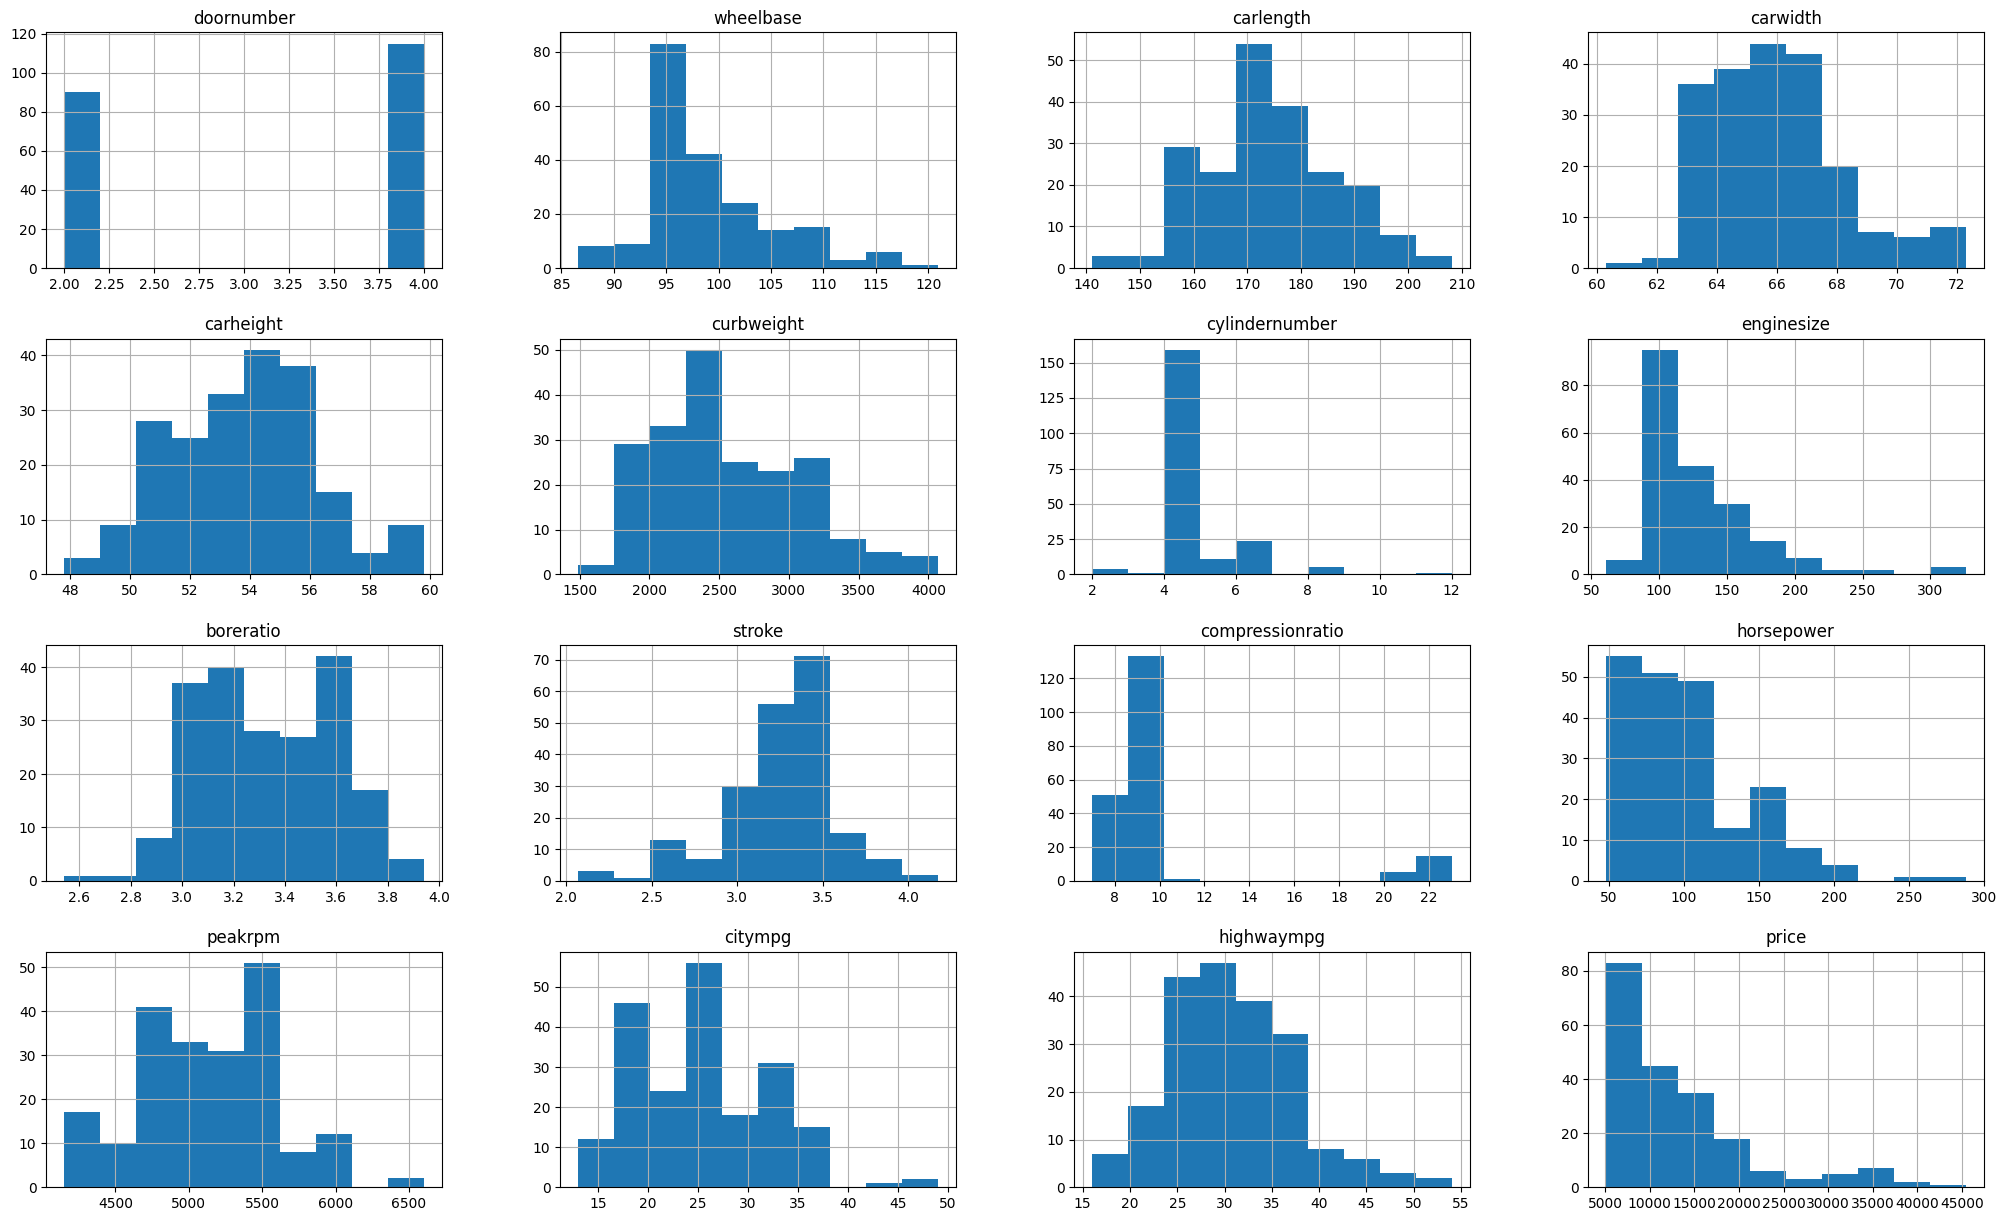

In [117]:
df.hist(figsize=(25,15))

In [118]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [119]:
train_columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
        'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
train_data=df[train_columns]
train_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,...,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,...,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,...,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [120]:
train_data=pd.get_dummies(train_data, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
                 'enginetype'], drop_first=True, dtype='int64')

train_data.head()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,1,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,1,0,0,0,0,0,0,0
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,1,0,0,0,0,0,1,0
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,1,0,0,0,0,1,0,0,0
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0


In [121]:
X=train_data.drop('price',axis=1)
y=train_data['price']

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [124]:
reg.fit(X_train,y_train)

LinearRegression()

In [125]:
reg.score(X_train,y_train)

0.9379456772540001

In [126]:
list(reg.predict(X_test))[:5]

[np.float64(26848.41157998195),
 np.float64(18287.74337144974),
 np.float64(10658.595699261816),
 np.float64(11871.985157095485),
 np.float64(27661.60627330203)]

In [127]:
list(y_test)[:5]

[30760.0, 17859.167, 9549.0, 11850.0, 28248.0]

In [128]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,reg.predict(X_test),multioutput='uniform_average')
MAE

2370.3614296854385

In [129]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,reg.predict(X_test),multioutput='uniform_average')
MSE

14080560.374002295

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,reg.predict(X_test))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


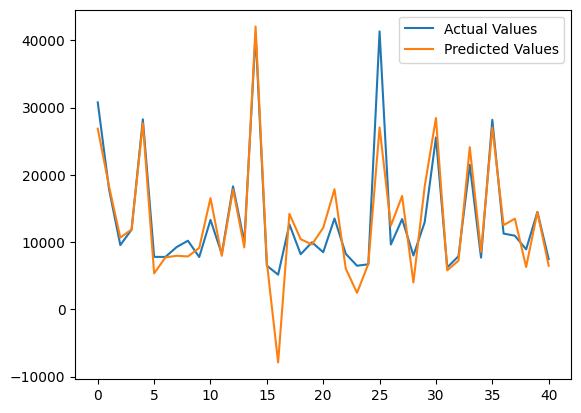

In [ ]:
#maak nu een grafiek waar je de lineaire regressie vergelijkt met de echte waarden
import matplotlib.pyplot as plt
plt.scatter(y_test,reg.predict(X_test))
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")

